In [1]:
import os
import argparse
from ta_pet_id.core.utils import get_package_path
from ta_pet_id.pipeline import yolo, efficientnet, matcher
from ta_pet_id.core.base_utils import silence_all_warnings

exceptioncannot open resource
exceptioncannot open resource


In [1]:
import pandas as pd
from ta_pet_id.core.context import create_context as _create_context
from ta_pet_id.pipeline.main import (enroll_pet as _enroll_pet,
                                     infer_pet_id as _infer_pet_id,
                                     train_efficientnet as _train_efficientnet,
                                     train_yolo as _train_yolo)
from ta_pet_id.data_prep import db_utils
from ta_pet_id.data_prep import core
from ta_pet_id.pipeline import yolo, efficientnet
from ta_pet_id.evaluation.report import get_pipeline_eval_report as _get_pipeline_eval_report
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


exceptioncannot open resource
exceptioncannot open resource


In [3]:
# !pip install pybboxes
import pybboxes as pbx

In [4]:
config_path = os.path.join(get_package_path(), "../notebooks/anandu/conf/config.yml")
context_obj = _create_context(config_path)
yolo_model_objs = yolo.load_model(context_obj)

In [6]:

img = cv2.imread(r"C:\Users\anandu.nandakuma\Desktop\Cat_id\data\yolo_full_data\images\val\00000075_026.jpg")

yolo.predict(context_obj,[img],yolo_model_objs)

[['multi-face'], [None], [None], [None]]

In [5]:
img = cv2.imread(r"C:\Users\anandu.nandakuma\Desktop\Cat_id\data\yolo_full_data\images\val\00000001_012.jpg")

yolo.predict(context_obj,[img],yolo_model_objs)

[['cat'],
 [(44, 284, 12, 205)],
 [0.8632349371910095],
 [array([[[ 67,  54,  38],
          [ 64,  51,  35],
          [ 59,  48,  34],
          ...,
          [153, 160, 157],
          [149, 160, 158],
          [159, 165, 170]],
  
         [[ 70,  55,  39],
          [ 65,  52,  36],
          [ 62,  49,  35],
          ...,
          [162, 166, 161],
          [157, 168, 166],
          [168, 174, 179]],
  
         [[ 71,  57,  39],
          [ 68,  53,  37],
          [ 63,  50,  36],
          ...,
          [158, 162, 156],
          [157, 168, 166],
          [164, 175, 179]],
  
         ...,
  
         [[  2,   3,   1],
          [  2,   3,   1],
          [  2,   3,   1],
          ...,
          [197, 203, 202],
          [173, 180, 177],
          [158, 164, 163]],
  
         [[  2,   3,   1],
          [  2,   3,   1],
          [  2,   3,   1],
          ...,
          [181, 185, 186],
          [172, 176, 177],
          [176, 181, 184]],
  
         [[  2,   3,  

In [10]:
len([[[44.0, 12.0, 284.0, 205.0, 0.8632349371910095, 0.0]]])

1

In [15]:
img_list = os.listdir("C:/Users/anandu.nandakuma/Desktop/Cat_id/yolo matrics/100_boundingbox_iou/")
bbx_path = "C:/Users/anandu.nandakuma/Desktop/Cat_id/yolo matrics/100_boundingbox_iou/"

img_path = "C:/Users/anandu.nandakuma/Desktop/Cat_id/data/yolo_full_data/images/val/"


In [8]:
images =[]
for i in os.listdir(img_path):
    if i in img_list:
        nam= str(i)[:-4]
        nam = cv2.imread(img_path + i)
        images.append(nam)

In [12]:
len(images)

100

In [13]:
predictions = yolo.predict(context_obj,images,yolo_model_objs)


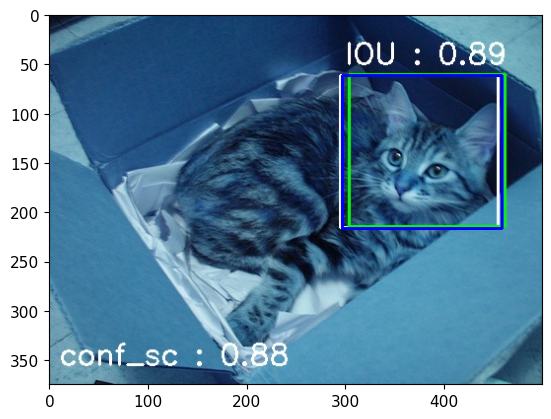

In [22]:

c=0
for i in img_list:
    img = cv2.imread(bbx_path+i)
    bb= predictions[1][c]
    img = cv2.rectangle(img, (bb[0], bb[2]), (bb[1], bb[3]), (0, 0, 255), 2)
    c+=1
    cv2.imwrite('C:/Users/anandu.nandakuma/Desktop/Cat_id/yolo matrics/bb_box_comparison/'+ i, img)
    plt.imshow(img)
    

In [ ]:
#model output

# x1,x2,y1,y2

#voc x1,y1,x2,y2


In [68]:
df = pd.read_excel('C:/Users/anandu.nandakuma/Desktop/Cat_id/lite_prediction_iou_bins_nw.xlsx',index_col=0)
df

,Image,detections,IOU,Confidence,o_class,p_class,True_Positives,False_Positives,False_Negative
0,00000001_012,1,0.771856,0.717773,0,0,1,0,0.0
1,00000001_027,1,0.803266,0.837402,0,0,1,0,0.0
2,00000001_029,1,0.906917,0.915527,0,0,1,0,0.0
3,00000003_009,1,0.889683,0.924805,0,0,1,0,0.0
4,00000004_003,1,0.921336,0.830078,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...
7117,yorkshire_terrier_14,1,0.000000,0.000000,1,others,0,0,1.0
7118,yorkshire_terrier_140,1,0.604196,0.894531,1,1,1,0,0.0
7119,yorkshire_terrier_142,1,0.867431,0.933105,1,1,1,0,0.0
7120,yorkshire_terrier_144,1,0.807279,0.663574,1,1,1,0,0.0


In [74]:
df[(df['o_class']==1) & (df['IOU'] >0.9)]

,Image,detections,IOU,Confidence,o_class,p_class,True_Positives,False_Positives,False_Negative
1914,american_bulldog_15,1,0.904062,0.898438,1,1,1,0,0.0
1916,american_bulldog_172,1,0.916250,0.936035,1,1,1,0,0.0
1919,american_pit_bull_terrier_107,1,0.915731,0.930664,1,1,1,0,0.0
1930,american_pit_bull_terrier_141,1,0.931631,0.922852,1,1,1,0,0.0
1931,american_pit_bull_terrier_148,1,0.900971,0.870117,1,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...
7099,wheaten_terrier_158,1,0.907435,0.871582,1,1,1,0,0.0
7110,yorkshire_terrier_104,1,0.902069,0.634277,1,0,0,1,1.0
7113,yorkshire_terrier_126,1,0.925054,0.879883,1,1,1,0,0.0
7116,yorkshire_terrier_138,1,0.915464,0.906738,1,1,1,0,0.0


In [75]:
image_names = list(df[(df['o_class']==1) & (df['IOU'] > 0.9)]['Image'].values)

In [59]:
# len(list(df[(df['o_class']==0) & (df['IOU'] < 0.7) & (df['p_class']!='others')]['Image'].values))

In [71]:
gt_labels ="C:/Users/anandu.nandakuma/Desktop/Cat_id/data/yolo_full_data/labels/val/"

pred_labels = "C:/Users/anandu.nandakuma/Desktop/Cat_id/yolo matrics/val/exp2/labels/"

img_path = "C:/Users/anandu.nandakuma/Desktop/Cat_id/data/yolo_full_data/images/val/"

In [11]:
def intersection_over_union(gt, pred):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(gt[0], pred[0])
    yA = max(gt[1], pred[1])
    xB = min(gt[2], pred[2])
    yB = min(gt[3], pred[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (gt[2] - gt[0] + 1) * (gt[3] - gt[1] + 1)
    boxBArea = (pred[2] - pred[0] + 1) * (pred[3] - pred[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the intersection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

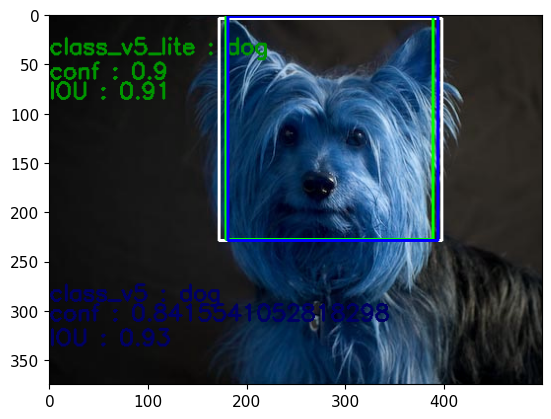

In [76]:
# For one predictions 

for i in image_names:
    im = img_path + str(i) + '.jpg'
    gt = gt_labels + str(i) + '.txt'
    pt = pred_labels + str(i) +'.txt'

    if (os.path.getsize(gt) != 0):
        img = cv2.imread(im)
        if img is None:
            continue
        else:
            img = cv2.imread(im)
            yolo_v5_pred = yolo.predict(context_obj,[img],yolo_model_objs)
            
            gt_l = pd.read_csv(gt, sep=" ",header=None)

            for row in range(0,gt_l.shape[0]):
                box = gt_l.iloc[row].values
                box2 = box[1:] 
                if box2[-2]>1:
                    box2[-2]=1
                if box2[-1]==0:
                    box2[-1]=0.01
                if box2[-1]>1:
                    box2[-1]=1
                if box2[1]==0:
                    box2[1]=0.01
                # print(box2)
                b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
                img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (255, 255, 255), 2)

            if os.path.exists(pt) == True :
                pt_l = pd.read_csv(pt, sep=" ",header=None)
                pt_bb=[]
                pt_cls =[]

                for row in range(0,pt_l.shape[0]):

                    box = pt_l.iloc[row].values
                    box2 = box[1:-1] 
                    p_clas = ['cat' if box[0]==0 else 'dog']
                    b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
                    img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (0, 255, 0), 2)
                    p_conf = round(box[-1],2)

                    iou_list = []
                    classes=[]
                    for j in range(0,gt_l.shape[0]):
                        box1 = gt_l.iloc[j].values
                        if box1[-2]>1:
                            box1[-2]=1
                        if box1[-1]>1:
                            box1[-1]=1
                        if box1[1]==0:
                            box1[1]=0.01
                        if box1[-1]==0:
                            box1[-1]=0.01
                        b1 = pbx.convert_bbox(box1[1:], from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))

                        iou = intersection_over_union(b1, b2)
                        iou_list.append(iou)
                        classes.append(box1[0])

                    iou = round(max(iou_list),2)
                    o = iou_list.index(max(iou_list))
                    o_cls = classes[o]

                    text = "conf : "+ str(p_conf)
                    font = cv2.FONT_HERSHEY_SIMPLEX
                    font_scale = 0.75
                    thickness = 2
                    position = (0,65 )
                    color = (0, 150, 0)
                    cv2.putText(img, text, position, font, font_scale, color, thickness)

                    text1 = "IOU : "+ str(iou)
                    position1 = (0,85) 
                    color = (0, 150, 0)
                    cv2.putText(img, text1, position1, font, font_scale, color, thickness)

                    text2 = "class_v5_lite : "+ str(p_clas[0])
                    position2 = (0,40) 
                    color = (0, 150, 0)
                    cv2.putText(img, text2, position2, font, font_scale, color, thickness)

            if (len(yolo_v5_pred[1]) ==1) :

                if yolo_v5_pred[1] is None:
                    continue
                else:
                    for x in range(0,len(yolo_v5_pred[1])):
                        v5_cls = yolo_v5_pred[0]
                        bb =  yolo_v5_pred[1][x]
                        if bb is None:
                            continue
                        else:

                            b2 = [bb[0], bb[2], bb[1], bb[3]]
                            v5_conf = yolo_v5_pred[2][x]   
                            img = cv2.rectangle(img, (bb[0], bb[2]), (bb[1], bb[3]), (0, 0, 255), 2)


                            for j in range(0,gt_l.shape[0]):
                                box1 = gt_l.iloc[j].values
                    
                                if box1[-2]>1:
                                    box1[-2]=1
                                if box1[-1]>1:
                                    box1[-1]=1
                                if box1[1]==0:
                                    box1[1]=0.01
                                if box1[-1]==0:
                                    box1[-1]=0.01
                                b1 = pbx.convert_bbox(box1[1:], from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))

                                iou = intersection_over_union(b1,b2)
                                iou_list.append(iou)
                                classes.append(box1[0])

                            iou = round(max(iou_list),2)
                            o = iou_list.index(max(iou_list))
                            o_cls = classes[o]

                            text = "conf : "+ str(v5_conf)
                            font = cv2.FONT_HERSHEY_SIMPLEX
                            font_scale = 0.75
                            thickness = 2
                            position = (0,img.shape[0]-65)
                            color = (0, 0, 100)
                            cv2.putText(img, text, position, font, font_scale, color, thickness)

                            text1 = "IOU : "+ str(round(iou,2))
                            position1 = (0,img.shape[0]-40) 
                            color = (0, 0, 100)
                            cv2.putText(img, text1, position1, font, font_scale, color, thickness)

                            text2 = "class_v5 : "+ str(v5_cls[0])
                            position2 = (0,img.shape[0]-85) 
                            color = (0, 0, 100)
                            cv2.putText(img, text2, position2, font, font_scale, color, thickness)
                            
        cv2.imwrite('C:/Users/anandu.nandakuma/Desktop/Cat_id/yolo matrics/dog_high_iou/'+ i+'.jpg', img)

        plt.imshow(img)
        # break
        



In [67]:
# l = [[1,2,3],['cat','dog',None],[1123,589,456]]
# print(l[0])
# for j in range(0,len(l[0])):
#     x=l[0][j]
#     y=l[1][j]
#     z=l[2][j]
#     print(x,y,z)
#     break

# l=[None]
# l[0][0]

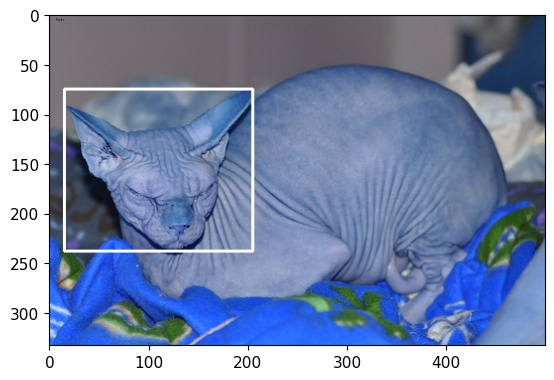

In [95]:
for i in image_names:
    im = img_path + str(i) + '.jpg'
    gt = gt_labels + str(i) + '.txt'
    pt = pred_labels + str(i) +'.txt'

    if (os.path.getsize(gt) != 0):
        img = cv2.imread(im)
        if img is None:
            continue
        else:
            img = cv2.imread(im)
            yolo_v5_pred = yolo.predict(context_obj,[img],yolo_model_objs)
            
            gt_l = pd.read_csv(gt, sep=" ",header=None)

            for row in range(0,gt_l.shape[0]):
                box = gt_l.iloc[row].values
                box2 = box[1:] 
                if box2[-2]>1:
                    box2[-2]=1
                if box2[-1]>1:
                    box2[-1]=1
                b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
                img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (255, 255, 255), 2)

            if os.path.exists(pt) == True :
                pt_l = pd.read_csv(pt, sep=" ",header=None)
                pt_bb=[]
                pt_cls =[]

                for row in range(0,pt_l.shape[0]):

                    box = pt_l.iloc[row].values
                    box2 = box[1:-1] 
                    p_clas = ['cat' if box[0]==0 else 'dog']
                    b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
                    img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (0, 255, 0), 2)

                    iou_list = []
                    classes=[]
                    for j in range(0,gt_l.shape[0]):
                        box1 = gt_l.iloc[j].values
                        b1 = pbx.convert_bbox(box1[1:], from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))

                        iou = intersection_over_union(b1, b2)
                        iou_list.append(iou)
                        classes.append(box1[0])

                    iou = round(max(iou_list),2)
                    o = iou_list.index(max(iou_list))
                    o_cls = classes[o]

                    # text = "conf_sc : "+ str(p_conf)
                    font = cv2.FONT_HERSHEY_SIMPLEX
                    font_scale = 1.0
                    thickness = 2
                    # position = (10,img.shape[0] - 20 ) 
                    # color = (255, 255, 255)
                    # cv2.putText(img, text, position, font, font_scale, color, thickness)

                    text1 = "IOU : "+ str(iou)
                    position1 = (b2[0],b2[1]) 
                    color = (0, 150, 0)
                    cv2.putText(img, text1, position1, font, font_scale, color, thickness)

                    text2 = "class: "+ str(p_clas[0])
                    position2 = (b2[2],b2[3]) 
                    color = (0, 100, 0)
                    cv2.putText(img, text2, position2, font, font_scale, color, thickness)
        
        # c=0
        # for xyz in images_:
        #     bb= yolo_predictions[1][c]
        #     img = cv2.rectangle(img, (bb[0], bb[2]), (bb[1], bb[3]), (0, 0, 255), 2)
        #     c+=1
        
        cv2.imwrite('C:/Users/anandu.nandakuma/Desktop/Cat_id/yolo matrics/cat_iou_nw/'+ i+'.jpg', img)

        plt.imshow(img)




351

In [101]:
images_ =[]
for i in os.listdir(img_path):
    i = str(i)[:-4]
    if i in image_names:
        nam = cv2.imread(str(i) + ".jpg")
        images_.append(nam)

In [103]:
yolo_cat_predictions = yolo.predict(context_obj,images,yolo_model_objs)


    

In [ ]:
bbx_path ="C:/Users/anandu.nandakuma/Desktop/Cat_id/yolo matrics/cat_iou_nw/"

In [119]:
print("No.of images passed : ", len(images_))
print("No.of images Predicted : ",len(yolo_cat_predictions[1]))


No.of images passed :  351
No.of images Predicted :  100


In [113]:
yolo_cat_predictions[0][:5]

['cat', 'cat', 'cat', 'cat', 'cat']

In [114]:
yolo_cat_predictions[1][:5]


[(44, 284, 12, 205),
 (181, 330, 77, 188),
 (327, 490, 0, 192),
 (237, 427, 38, 235),
 (139, 232, 116, 205)]

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


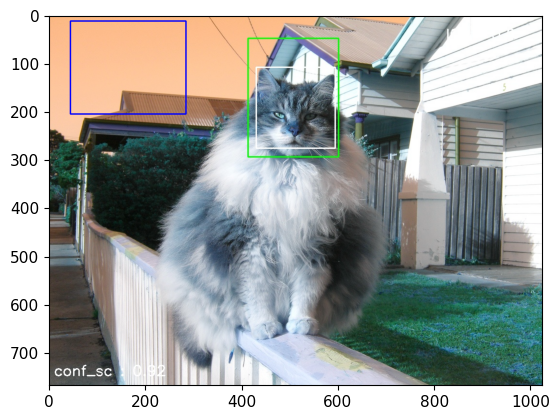

In [107]:
c=0
for i in image_names:
    im= str(i)+'.jpg'
    img = cv2.imread(bbx_path+im)
    bb= yolo_cat_predictions[1][c]
    img = cv2.rectangle(img, (bb[0], bb[2]), (bb[1], bb[3]), (0, 0, 255), 2)
    c+=1
    cv2.imwrite('C:/Users/anandu.nandakuma/Desktop/Cat_id/yolo matrics/cat_iou_nw/cat_low_iou/'+ i, img)
    plt.imshow(img)

In [96]:
# dog
image_names = list(df[(df['o_class']==1) & (df['IOU'] < 0.7)]['Image'].values)
len(image_names)

1682

C:/Users/anandu.nandakuma/Desktop/Cat_id/data/yolo_full_data/images/val/american_bulldog_118.jpg
[       0.62         0.6        0.52        0.37]
C:/Users/anandu.nandakuma/Desktop/Cat_id/data/yolo_full_data/images/val/american_bulldog_166.jpg
[       0.46        0.54        0.91         0.7]
C:/Users/anandu.nandakuma/Desktop/Cat_id/data/yolo_full_data/images/val/american_bulldog_191.jpg
[       0.39        0.33        0.28        0.26]
C:/Users/anandu.nandakuma/Desktop/Cat_id/data/yolo_full_data/images/val/basset_hound_101.jpg
[       0.32        0.52        0.31        0.49]
C:/Users/anandu.nandakuma/Desktop/Cat_id/data/yolo_full_data/images/val/basset_hound_115.jpg
[       0.52        0.42        0.34        0.67]
C:/Users/anandu.nandakuma/Desktop/Cat_id/data/yolo_full_data/images/val/basset_hound_129.jpg
[       0.52        0.47        0.96        0.93]
C:/Users/anandu.nandakuma/Desktop/Cat_id/data/yolo_full_data/images/val/basset_hound_13.jpg
[       0.68        0.34        0.63  

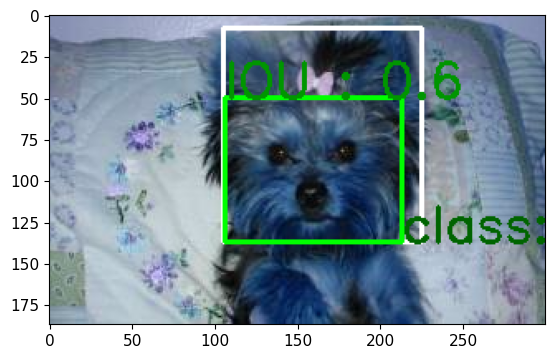

In [99]:
# Dog images


for i in image_names:
    im = img_path + str(i) + '.jpg'
    gt = gt_labels + str(i) + '.txt'
    pt = pred_labels + str(i) +'.txt'

    if (os.path.getsize(gt) != 0):
        img = cv2.imread(im)
        if img is None:
            continue
        else:
            img = cv2.imread(im)

            gt_l = pd.read_csv(gt, sep=" ",header=None)

            for row in range(0,gt_l.shape[0]):
                box = gt_l.iloc[row].values
                box2 = box[1:] 
                if box2[-2]>1:
                    box2[-2]=1
                if box2[-1]>1:
                    box2[-1]=1
                if box2[-1]==0:
                    box2[-1]=0.01

                print(im)
                print(box2)
                b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
                img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (255, 255, 255), 2)

            if os.path.exists(pt) == True :
                pt_l = pd.read_csv(pt, sep=" ",header=None)
                pt_bb=[]
                pt_cls =[]

                for row in range(0,pt_l.shape[0]):

                    box = pt_l.iloc[row].values
                    box2 = box[1:-1] 
                    p_clas = ['cat' if box[0]==0 else 'dog']
                    b2 = pbx.convert_bbox(box2, from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))
                    img = cv2.rectangle(img, (b2[0], b2[1]), (b2[2], b2[3]), (0, 255, 0), 2)

                    iou_list = []
                    classes=[]
                    for j in range(0,gt_l.shape[0]):
                        box1 = gt_l.iloc[j].values
                        b1 = pbx.convert_bbox(box1[1:], from_type="yolo", to_type="voc", image_size=(img.shape[1],img.shape[0]))

                        iou = intersection_over_union(b1, b2)
                        iou_list.append(iou)
                        classes.append(box1[0])

                    iou = round(max(iou_list),2)
                    o = iou_list.index(max(iou_list))
                    o_cls = classes[o]

                    # text = "conf_sc : "+ str(p_conf)
                    font = cv2.FONT_HERSHEY_SIMPLEX
                    font_scale = 1.0
                    thickness = 2
                    # position = (10,img.shape[0] - 20 ) 
                    # color = (255, 255, 255)
                    # cv2.putText(img, text, position, font, font_scale, color, thickness)

                    text1 = "IOU : "+ str(iou)
                    position1 = (b2[0],b2[1]) 
                    color = (0, 150, 0)
                    cv2.putText(img, text1, position1, font, font_scale, color, thickness)

                    text2 = "class: "+ str(p_clas[0])
                    position2 = (b2[2],b2[3]) 
                    color = (0, 100, 0)
                    cv2.putText(img, text2, position2, font, font_scale, color, thickness)
        
        # c=0
        # for xyz in images_:
        #     bb= yolo_predictions[1][c]
        #     img = cv2.rectangle(img, (bb[0], bb[2]), (bb[1], bb[3]), (0, 0, 255), 2)
        #     c+=1
        
        cv2.imwrite('C:/Users/anandu.nandakuma/Desktop/Cat_id/yolo matrics/dog_iou/'+ i+'.jpg', img)

        plt.imshow(img)


